<a href="https://colab.research.google.com/github/akshaay729-droid/YBI-Project/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import tensorflow as tf
from PIL import Image

# Step 1: Upload images (Cancer and Non-Cancer)
# Upload cancer images
print("Upload Cancer Images:")
uploaded_cancer_files = files.upload()

# Upload non-cancer images
print("Upload Non-Cancer Images:")
uploaded_non_cancer_files = files.upload()

# Step 2: Preprocess Images
def preprocess_images(files_list):
    images = []
    for file in files_list:
        img = Image.open(file)  # Open the image file
        img = img.convert("RGB")  # Convert to RGB to ensure 3 channels
        img_resized = img.resize((224, 224))  # Resize to match model input size
        img_array = img_to_array(img_resized)  # Convert to numpy array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        images.append(img_array)
    return np.vstack(images)

cancer_images = preprocess_images(uploaded_cancer_files.keys())
non_cancer_images = preprocess_images(uploaded_non_cancer_files.keys())

# Step 3: Prepare Data Labels
# Label 1 for cancer, 0 for non-cancer
cancer_labels = np.ones(cancer_images.shape[0])
non_cancer_labels = np.zeros(non_cancer_images.shape[0])

# Combine images and labels
images = np.vstack((cancer_images, non_cancer_images))
labels = np.concatenate((cancer_labels, non_cancer_labels))

# Step 4: Build the CNN Model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification (Cancer/Non-Cancer)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Train the Model
model = create_model()
model.fit(images, labels, epochs=5, batch_size=32)

# Step 6: Upload Multiple New Images for Prediction
print("Upload Multiple New Images to Classify:")
uploaded_new_files = files.upload()

# Step 7: Preprocess and Predict Multiple New Images
def classify_images(files_list):
    predictions = []
    for file in files_list:
        new_image = Image.open(file)  # Open the uploaded new image
        new_image = new_image.convert("RGB")  # Convert to RGB to ensure 3 channels
        new_image_resized = new_image.resize((224, 224))  # Resize to match model input size
        new_image_array = img_to_array(new_image_resized)
        new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension

        # Predict the class of the new image
        prediction = model.predict(new_image_array)

        # Append the result to predictions
        if prediction[0] > 0.5:
            predictions.append((file, "Cancer"))
        else:
            predictions.append((file, "Non-Cancer"))
    return predictions

# Classify the uploaded new images
predictions = classify_images(uploaded_new_files.keys())

# Output the predictions
for file, prediction in predictions:
    print(f"Image {file} is classified as: {prediction}")


Upload Cancer Images:


Saving malignant (17)_mask.png to malignant (17)_mask.png
Saving malignant (18).png to malignant (18).png
Saving malignant (18)_mask.png to malignant (18)_mask.png
Saving malignant (1).png to malignant (1).png
Saving malignant (1)_mask.png to malignant (1)_mask.png
Saving malignant (2).png to malignant (2).png
Saving malignant (2)_mask.png to malignant (2)_mask.png
Saving malignant (3).png to malignant (3).png
Saving malignant (3)_mask.png to malignant (3)_mask.png
Saving malignant (4).png to malignant (4).png
Saving malignant (4)_mask.png to malignant (4)_mask (1).png
Saving malignant (5).png to malignant (5) (1).png
Saving malignant (5)_mask.png to malignant (5)_mask (1).png
Saving malignant (6).png to malignant (6) (1).png
Saving malignant (6)_mask.png to malignant (6)_mask (1).png
Saving malignant (7).png to malignant (7) (1).png
Saving malignant (7)_mask.png to malignant (7)_mask (1).png
Saving malignant (8).png to malignant (8) (1).png
Saving benign (49).png to benign (49) (1).pn

Saving normal (41).png to normal (41) (1).png
Saving normal (41)_mask.png to normal (41)_mask (1).png
Saving normal (42).png to normal (42) (1).png
Saving normal (42)_mask.png to normal (42)_mask (1).png
Saving normal (43).png to normal (43) (1).png
Saving normal (43)_mask.png to normal (43)_mask (1).png
Saving normal (44).png to normal (44) (1).png
Saving normal (44)_mask.png to normal (44)_mask (1).png
Saving normal (45).png to normal (45) (1).png
Saving normal (45)_mask.png to normal (45)_mask (1).png
Saving normal (46).png to normal (46) (1).png
Saving normal (46)_mask.png to normal (46)_mask (1).png
Saving normal (47).png to normal (47) (1).png
Saving normal (47)_mask.png to normal (47)_mask (1).png
Saving normal (48).png to normal (48) (1).png
Saving normal (48)_mask.png to normal (48)_mask (1).png
Saving normal (49).png to normal (49) (1).png
Saving normal (49)_mask.png to normal (49)_mask (1).png
Saving normal (50).png to normal (50) (1).png
Saving normal (30)_mask.png to norma

Saving 1.png to 1.png
Saving 3.png to 3.png
Saving 5.png to 5.png
Saving 7.png to 7.png
Saving 9.png to 9.png
Saving 2.jpg to 2.jpg
Saving 4.jpg to 4.jpg
Saving 6.jpg to 6.jpg
Saving 8.jpg to 8.jpg
Saving 10.jpg to 10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image 1.png is classified as: Non-Cancer
Image 3.png is classified as: Non-Cancer
Image 5.png is classified as: Non-Cancer
Image 7.png is classified as: Non-Cancer
Image 9.png is classified as: Non-Cancer
Image 2.jpg is classified as: Cancer
Image 4.jpg is classified as: Cancer
Image 6.jpg is classified as: Cancer
Image 8.jpg is classified as: Cancer
Image 10.jpg is classified as: Cancer


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_1 (MaxPooling2D)          │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_2 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPooling_2 (MaxPooling2D)          │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

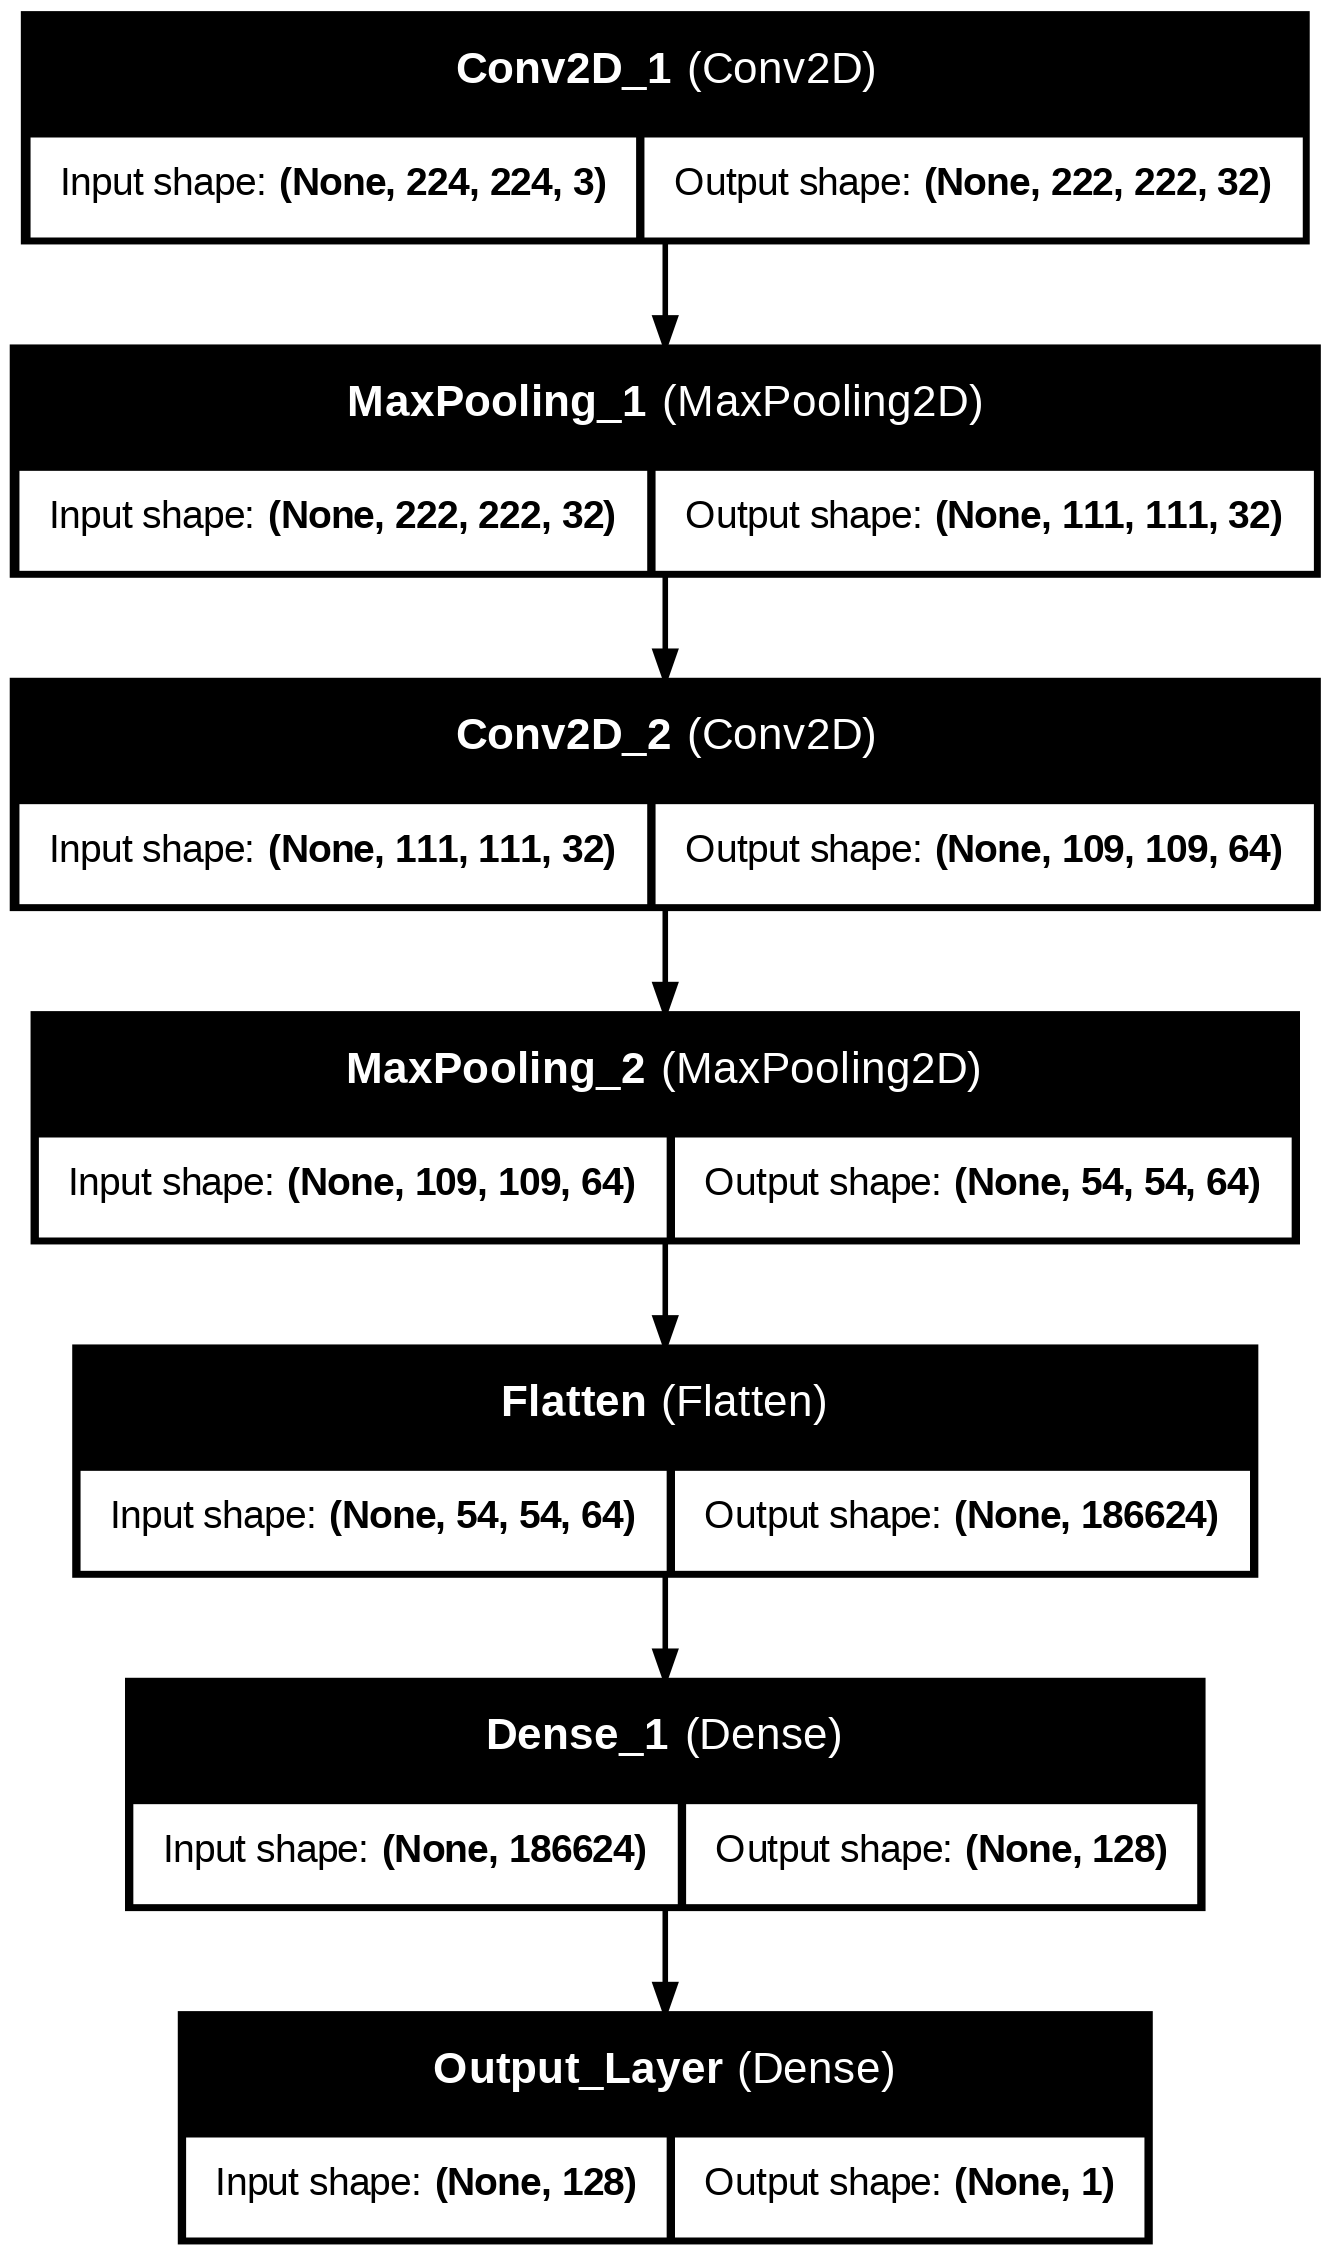

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.utils import plot_model

# Define the CNN model
model = Sequential([
    Input(shape=(224, 224, 3)),  # Input layer (for 224x224 RGB images)
    Conv2D(32, (3, 3), activation='relu', name='Conv2D_1'),  # Convolutional layer 1
    MaxPooling2D((2, 2), name='MaxPooling_1'),  # MaxPooling layer 1
    Conv2D(64, (3, 3), activation='relu', name='Conv2D_2'),  # Convolutional layer 2
    MaxPooling2D((2, 2), name='MaxPooling_2'),  # MaxPooling layer 2
    Flatten(name='Flatten'),  # Flatten the feature maps
    Dense(128, activation='relu', name='Dense_1'),  # Fully connected layer
    Dense(1, activation='sigmoid', name='Output_Layer')  # Output layer
])

# Compile the model (optional for visualization purposes)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Save and display the model architecture as an image
plot_file = 'cnn_architecture.png'
plot_model(model, to_file=plot_file, show_shapes=True, show_layer_names=True)

# Display the saved image in Colab
from IPython.display import Image
Image(filename=plot_file)


In [ ]:
!pip install plotly


In [ ]:
import plotly.graph_objects as go

# Define the CNN architecture as a diagram
fig = go.Figure()

# Add convolutional layers
fig.add_trace(go.Scatter(
    x=[1, 1], y=[0, 1], mode="lines", name="Conv Layer 1",
    line=dict(color="blue", width=10), showlegend=True
))

fig.add_trace(go.Scatter(
    x=[2, 2], y=[0, 1], mode="lines", name="Conv Layer 2",
    line=dict(color="blue", width=10), showlegend=True
))

# Add pooling layers
fig.add_trace(go.Scatter(
    x=[1.5, 1.5], y=[1, 2], mode="lines", name="Max Pooling Layer",
    line=dict(color="green", width=10), showlegend=True
))

# Add fully connected layers
fig.add_trace(go.Scatter(
    x=[2.5, 2.5], y=[1, 2], mode="lines", name="Fully Connected Layer 1",
    line=dict(color="red", width=10), showlegend=True
))

# Add output layer
fig.add_trace(go.Scatter(
    x=[3, 3], y=[0, 1], mode="lines", name="Output Layer",
    line=dict(color="purple", width=10), showlegend=True
))

# Layout for the diagram
fig.update_layout(
    title="CNN Architecture",
    xaxis=dict(showgrid=False, zeroline=False, tickvals=[]),
    yaxis=dict(showgrid=False, zeroline=False, tickvals=[]),
    showlegend=True,
    annotations=[
        dict(
            x=1, y=0.5,
            text="Conv1",
            showarrow=True,
            arrowhead=2
        ),
        dict(
            x=2, y=0.5,
            text="Conv2",
            showarrow=True,
            arrowhead=2
        ),
        dict(
            x=1.5, y=1.5,
            text="Max Pool",
            showarrow=True,
            arrowhead=2
        ),
        dict(
            x=2.5, y=1.5,
            text="Fully Connected 1",
            showarrow=True,
            arrowhead=2
        ),
        dict(
            x=3, y=0.5,
            text="Output",
            showarrow=True,
            arrowhead=2
        ),
    ]
)

fig.show()


In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model


In [ ]:
# Define a detailed CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# MaxPooling Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))

# MaxPooling Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))

# MaxPooling Layer 3
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from 3D to 1D
model.add(Flatten())

# Fully Connected (Dense) Layer 1
model.add(Dense(128, activation='relu'))

# Dropout Layer for regularization
model.add(Dropout(0.5))

# Fully Connected (Dense) Layer 2
model.add(Dense(64, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Use softmax for multi-class classification

# Summarize the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

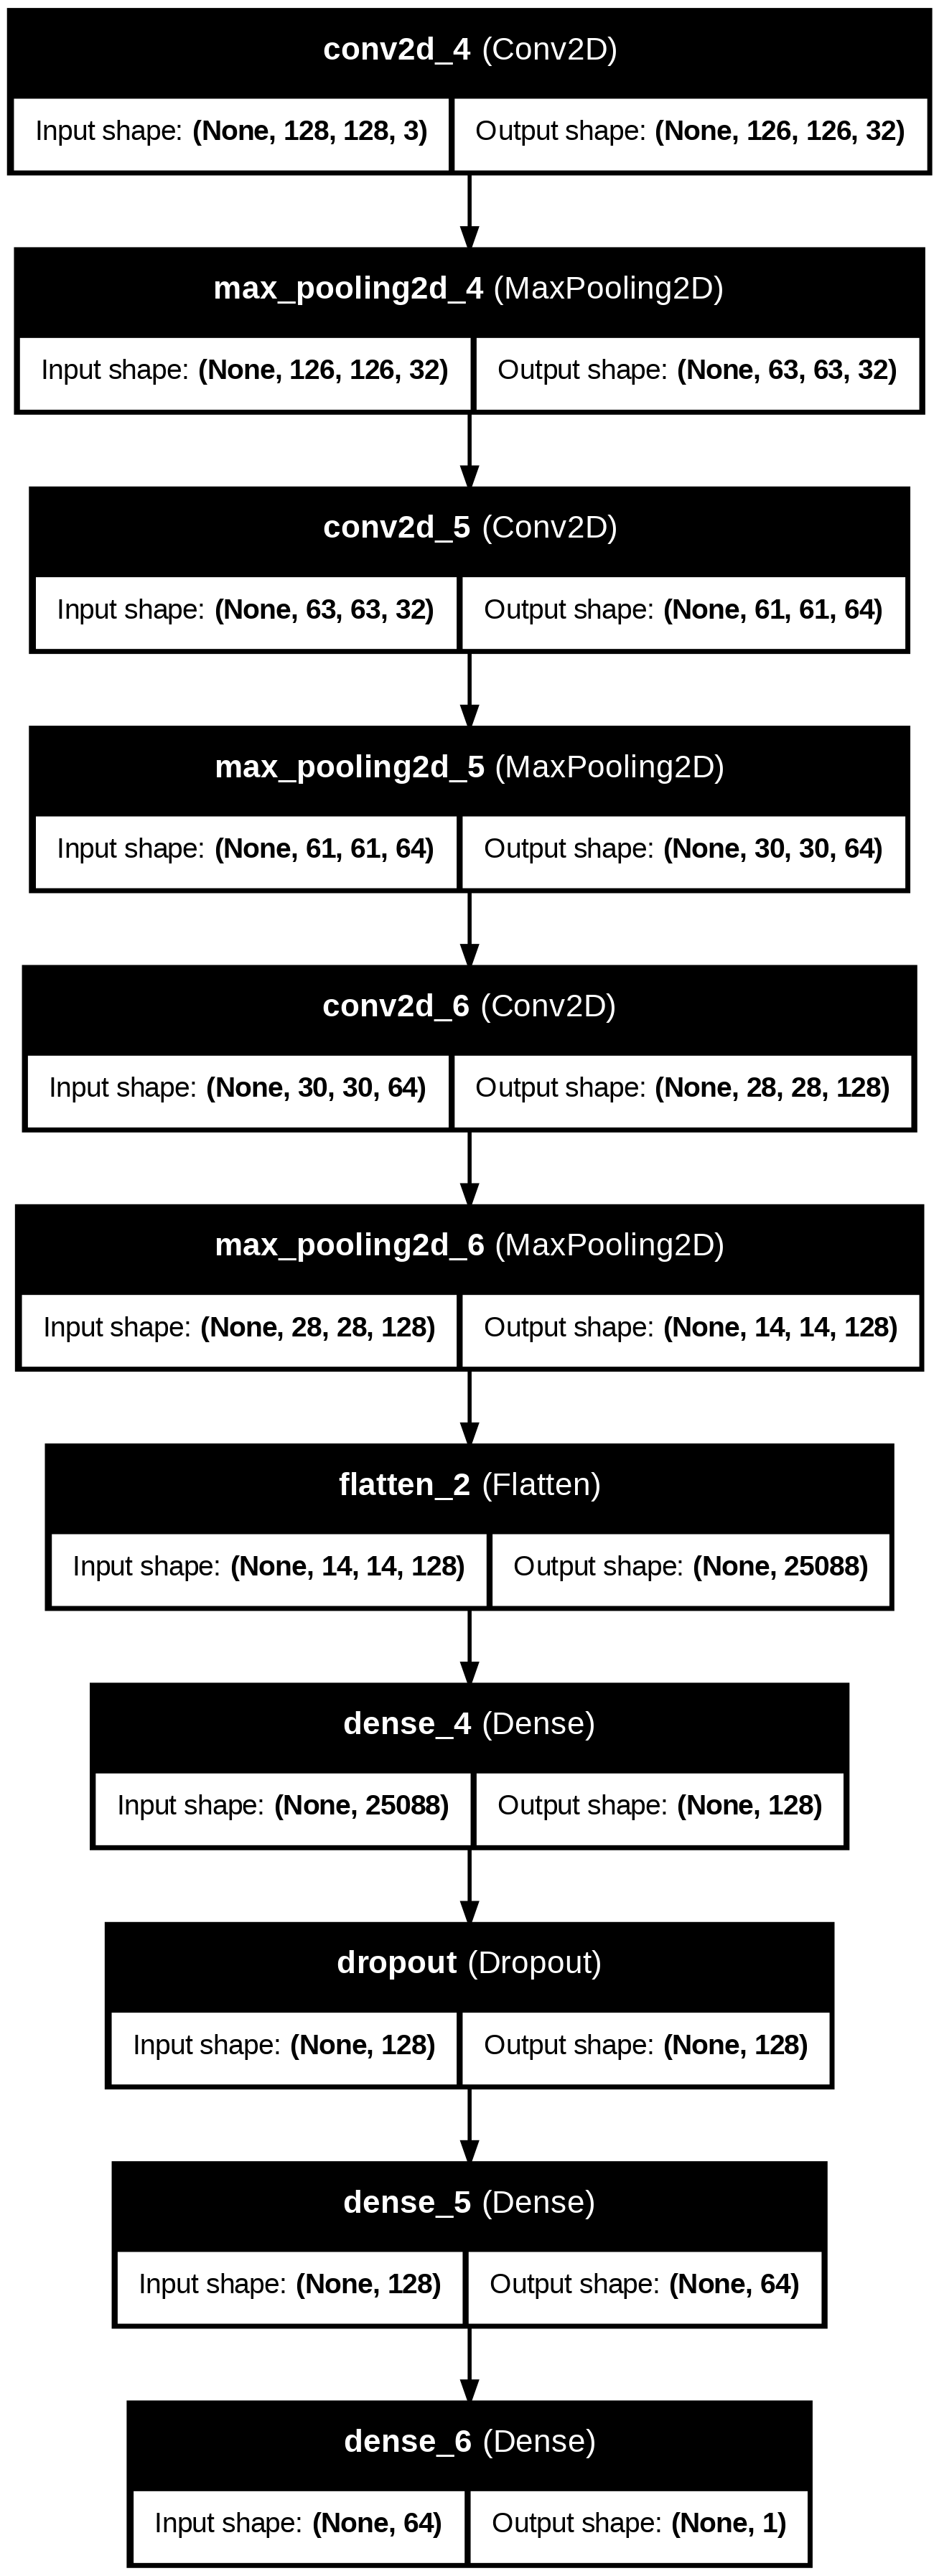

In [ ]:
# Generate the model diagram and save it as an image file
plot_model(model, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True)


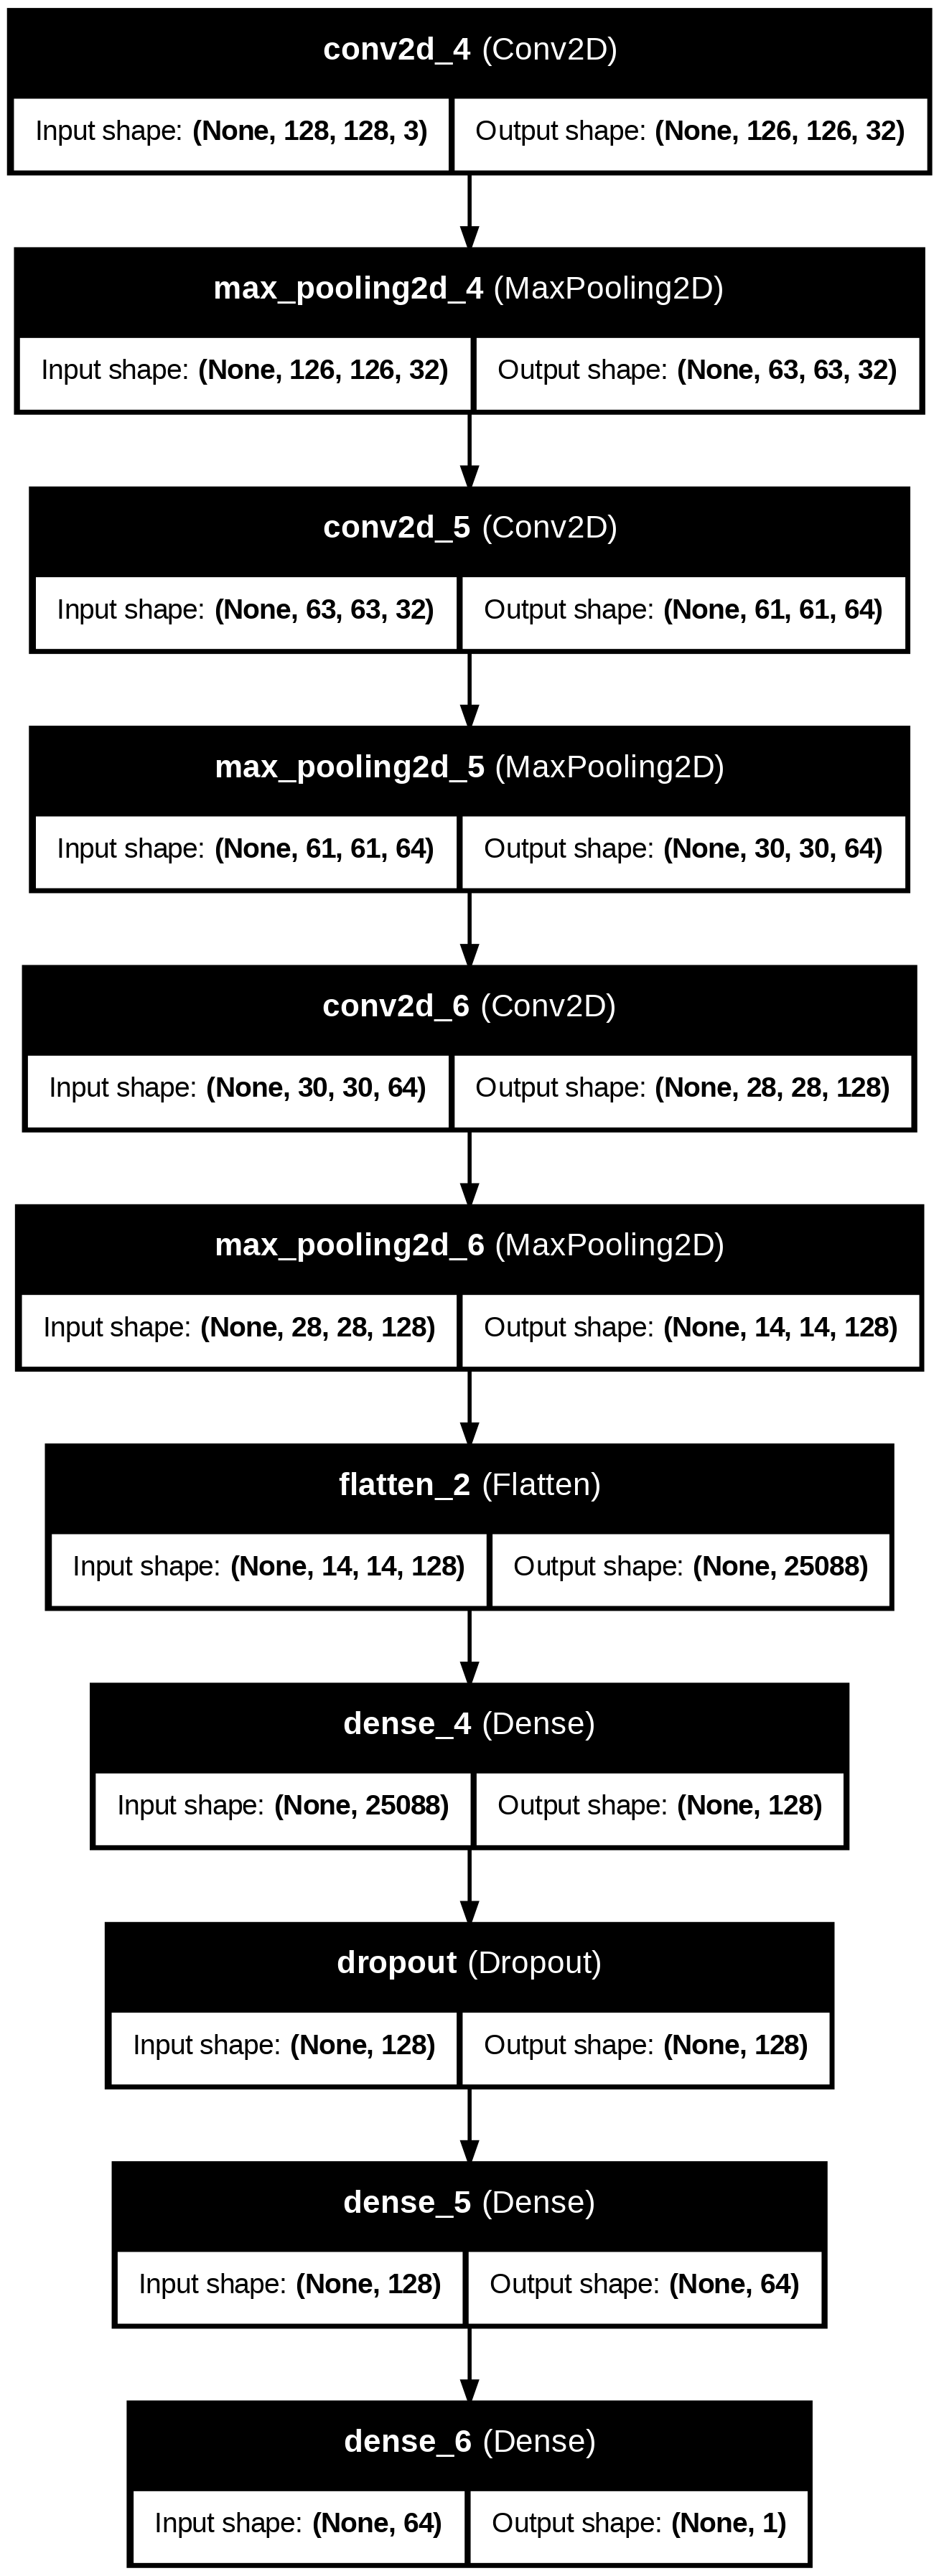

In [ ]:
from IPython.display import Image

# Display the saved architecture image
Image(filename='cnn_model_architecture.png')


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Define a simple CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# MaxPooling Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))

# MaxPooling Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))

# MaxPooling Layer 3
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from 3D to 1D
model.add(Flatten())

# Fully Connected (Dense) Layer
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification (use softmax for multi-class)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


Upload Cancer Images:


Saving malignant (3).png to malignant (3) (2).png
Saving malignant (3)_mask.png to malignant (3)_mask (2).png
Saving malignant (4).png to malignant (4) (2).png
Saving malignant (4)_mask.png to malignant (4)_mask (3).png
Saving malignant (5).png to malignant (5) (3).png
Saving malignant (5)_mask.png to malignant (5)_mask (3).png
Saving malignant (6).png to malignant (6) (3).png
Saving malignant (6)_mask.png to malignant (6)_mask (3).png
Saving malignant (7).png to malignant (7) (3).png
Saving malignant (7)_mask.png to malignant (7)_mask (3).png
Saving malignant (8).png to malignant (8) (3).png
Saving benign (49).png to benign (49) (3).png
Saving benign (49)_mask.png to benign (49)_mask (3).png
Saving benign (50).png to benign (50) (3).png
Saving benign (50)_mask.png to benign (50)_mask (3).png
Saving benign (38)_mask.png to benign (38)_mask (3).png
Saving benign (39).png to benign (39) (3).png
Saving benign (39)_mask.png to benign (39)_mask (3).png
Saving benign (40).png to benign (40) 

Saving normal (41).png to normal (41) (2).png
Saving normal (41)_mask.png to normal (41)_mask (2).png
Saving normal (42).png to normal (42) (2).png
Saving normal (42)_mask.png to normal (42)_mask (2).png
Saving normal (43).png to normal (43) (2).png
Saving normal (43)_mask.png to normal (43)_mask (2).png
Saving normal (44).png to normal (44) (2).png
Saving normal (44)_mask.png to normal (44)_mask (2).png
Saving normal (45).png to normal (45) (2).png
Saving normal (45)_mask.png to normal (45)_mask (2).png
Saving normal (46).png to normal (46) (2).png
Saving normal (46)_mask.png to normal (46)_mask (2).png
Saving normal (47).png to normal (47) (2).png
Saving normal (47)_mask.png to normal (47)_mask (2).png
Saving normal (48).png to normal (48) (2).png
Saving normal (48)_mask.png to normal (48)_mask (2).png
Saving normal (49).png to normal (49) (2).png
Saving normal (49)_mask.png to normal (49)_mask (2).png
Saving normal (50).png to normal (50) (2).png
Saving normal (30)_mask.png to norma

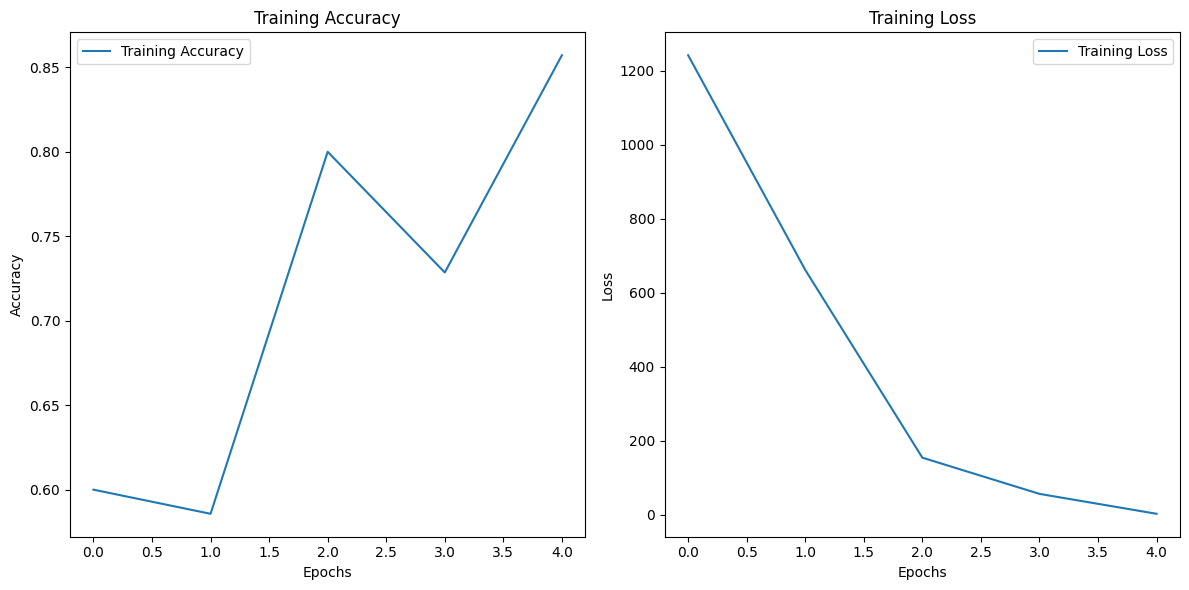

Upload Multiple New Images to Classify:


Saving 1.png to 1 (1).png
Saving 3.png to 3 (1).png
Saving 5.png to 5 (1).png
Saving 7.png to 7 (1).png
Saving 9.png to 9 (1).png
Saving 11.png to 11.png
Saving 13.png to 13.png
Saving 15.png to 15.png
Saving 17.png to 17.png
Saving 18.png to 18.png
Saving 2.jpg to 2 (1).jpg
Saving 4.jpg to 4 (1).jpg
Saving 6.jpg to 6 (1).jpg
Saving 8.jpg to 8 (1).jpg
Saving 10.jpg to 10 (1).jpg
Saving 14.jpg to 14.jpg
Saving 16.jpg to 16.jpg
Saving 12.jpg to 12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Upload images (Cancer and Non-Cancer)
# Upload cancer images
print("Upload Cancer Images:")
uploaded_cancer_files = files.upload()

# Upload non-cancer images
print("Upload Non-Cancer Images:")
uploaded_non_cancer_files = files.upload()

# Step 2: Preprocess Images
def preprocess_images(files_list):
    images = []
    for file in files_list:
        img = Image.open(file)  # Open the image file
        img = img.convert("RGB")  # Convert to RGB to ensure 3 channels
        img_resized = img.resize((224, 224))  # Resize to match model input size
        img_array = img_to_array(img_resized)  # Convert to numpy array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        images.append(img_array)
    return np.vstack(images)

cancer_images = preprocess_images(uploaded_cancer_files.keys())
non_cancer_images = preprocess_images(uploaded_non_cancer_files.keys())

# Step 3: Prepare Data Labels
# Label 1 for cancer, 0 for non-cancer
cancer_labels = np.ones(cancer_images.shape[0])
non_cancer_labels = np.zeros(non_cancer_images.shape[0])

# Combine images and labels
images = np.vstack((cancer_images, non_cancer_images))
labels = np.concatenate((cancer_labels, non_cancer_labels))

# Step 4: Build the CNN Model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification (Cancer/Non-Cancer)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Train the Model and Save the History
model = create_model()
history = model.fit(images, labels, epochs=5, batch_size=32)

# Step 6: Plot the Training Accuracy and Loss
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the graphs
plot_training_history(history)

# Step 7: Upload Multiple New Images for Prediction
print("Upload Multiple New Images to Classify:")
uploaded_new_files = files.upload()

# Step 8: Preprocess and Predict Multiple New Images
def classify_images(files_list):
    predictions = []
    for file in files_list:
        new_image = Image.open(file)  # Open the uploaded new image
        new_image = new_image.convert("RGB")  # Convert to RGB to ensure 3 channels
        new_image_resized = new_image.resize((224, 224))  # Resize to match model input size
        new_image_array = img_to_array(new_image_resized)
        new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension

        # Predict the class of the new image
        prediction = model.predict(new_image_array)

        # Append the result to predictions
        if prediction[0] > 0.5:
            predictions.append((file, "Cancer"))
        else:
            predictions.append((file, "Non-Cancer"))
    return predictions

# Classify the uploaded new images
predictions = classify_images(uploaded_new_files.keys())

# Output the predictions
for file, prediction in predictions:
    print(f"Image {file} is classified as: {prediction}")
